#### 2-dimentional animation

This code produce an animation of Ez component in TEz-solver as a heatmap.

All data in "2D_anim._values.txt" was created after 2Dimention_solution_TEz.cpp work. So, first cell is properly parse whole data, second one is just showing it frame (at time) by frame.

In [7]:
#########/ data initializing /#################################################
SRC_POS_X, SRC_POS_Y = 100, 100

Ez = []
with open("2D_anim._values.txt", 'r') as f:
    TIME = (int)(f.readline())
    SIZE = f.readline().split(' ')
    SIZE_X = (int)(SIZE[0])
    SIZE_Y = (int)(SIZE[1])
    for t in range(TIME):
        temp = f.readline() 
        temp = temp.split(' ')[:-1]
        Ez_X = []
        for X in range(len(temp)) : # [0.01, 0.02, 0.03]
            Ez_X.append(list(map(float, temp[X].split(',')[:-1])))
        Ez_X = list(map(list, zip(*Ez_X))) # transposing data
        Ez.append(Ez_X)

<IPython.core.display.Javascript object>


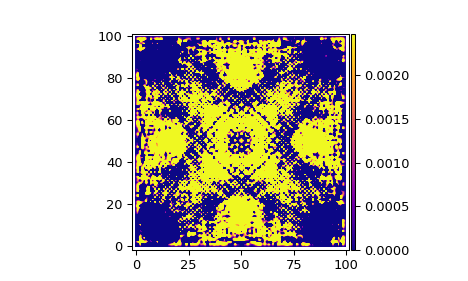

In [8]:
#########/ animation /#########################################################
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

%matplotlib notebook

fig = plt.figure(figsize=(5,3))
ax = fig.add_subplot(111, xlim=(-2,SIZE_X+1), ylim=(-2,SIZE_Y+1))

def redraw(i):
    Ez_.set_data(Ez[i]) 
    return Ez_ 

Ez_ = ax.imshow(Ez[0],
                cmap = plt.get_cmap('plasma'),
                interpolation="gaussian",
                animated=True)

plt.colorbar(Ez_,
             cax = inset_axes(ax, 
                              width="2%", 
                              height="100%",
                              loc="lower left",
                              bbox_to_anchor=(1.01, 0, 1, 1),
                              bbox_transform=ax.transAxes,
                              borderpad=0),)

anim = FuncAnimation(fig,
                     redraw,
                     frames=TIME,
                     interval=10,
                     blit=True,
                     )

plt.show()